# Preprocessing

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [59]:
data = pd.read_csv("BMI_IOS_SCD_Asthma.csv")
data.head()

,Group,Subject ID,Observation_number,Hydroxyurea,Asthma,ICS,LABA,Gender,Age (months),Height (cm),Weight (Kg),BMI,R5Hz_PP,R20Hz_PP,X5Hz_PP,Fres_PP
0,C-SCD,1,1,Yes,Yes,Yes,No,Male,239,164.1,61.5,22.84,145,133,-456.0,NaN
1,C-SCD,1,2,Yes,Yes,Yes,No,Male,193,162.7,62.3,23.53,103,98,111.0,169.0
2,C-SCD,1,3,Yes,Yes,Yes,Yes,Male,212,163.5,63.1,23.60,107,98,174.0,159.0
3,C-SCD,1,4,Yes,Yes,Yes,Yes,Male,224,163.8,63.7,23.74,87,87,-303.0,NaN
4,C-SCD,2,1,No,No,No,No,Female,204,154.5,66.4,27.82,124,121,98.0,135.0


In [60]:
data.columns

Index(['Group', 'Subject ID', 'Observation_number', 'Hydroxyurea', 'Asthma',
       'ICS', 'LABA', 'Gender', 'Age (months)', 'Height (cm)', 'Weight (Kg)',
       'BMI', 'R5Hz_PP', 'R20Hz_PP', 'X5Hz_PP', 'Fres_PP'],
      dtype='object')

In [61]:
# Suppression des colonnes inutules
data.drop(columns=['Group', 'Subject ID', 'Observation_number'], inplace=True)

In [62]:
# Remplacements des valeurs manquantes de la colonne Fres_PP par la moyenne
if 'Fres_PP' in data.columns and data['Fres_PP'].isnull().any():
    mean_fres_pp = data['Fres_PP'].mean()
    data['Fres_PP'] = data['Fres_PP'].fillna(round(mean_fres_pp, 1))

In [63]:
# Check des doublons de valeurs
data.duplicated().value_counts()

False    219
Name: count, dtype: int64

In [64]:
data.drop_duplicates(inplace=True)

In [65]:
data.dtypes

Hydroxyurea      object
Asthma           object
ICS              object
LABA             object
Gender           object
Age (months)      int64
Height (cm)     float64
Weight (Kg)     float64
BMI             float64
R5Hz_PP           int64
R20Hz_PP          int64
X5Hz_PP         float64
Fres_PP         float64
dtype: object

In [66]:
data.isna().sum()

Hydroxyurea     0
Asthma          0
ICS             0
LABA            0
Gender          0
Age (months)    0
Height (cm)     0
Weight (Kg)     0
BMI             0
R5Hz_PP         0
R20Hz_PP        0
X5Hz_PP         0
Fres_PP         0
dtype: int64

In [67]:
data.Gender.unique()

array(['Male', 'Female', 'male'], dtype=object)

In [68]:
# Remplacement des valeurs "male" par "Male" dans la colonne "Gender"
data['Gender'] = data['Gender'].replace('male', 'Male')

In [69]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [70]:
# Conversion des colonnes catégorielles en numériques
data['Hydroxyurea'] = data['Hydroxyurea'].map({'Yes': 1, 'No': 0})
data['ICS'] = data['ICS'].map({'Yes': 1, 'No': 0})
data['LABA'] = data['LABA'].map({'Yes': 1, 'No': 0})

In [71]:
data.rename(columns={'Age (months)': 'Age'}, inplace=True)
data.rename(columns={'Height (cm)': 'Height'}, inplace=True)
data.rename(columns={'Weight (Kg)': 'Weight'}, inplace=True)

In [72]:
# Conversion des valeurs de la colonne "Age" de mois en années
if 'Age' in data.columns:
    data['Age'] = data['Age'] / 12

In [73]:
data.value_counts()

Hydroxyurea  Asthma  ICS  LABA  Gender  Age        Height  Weight  BMI    R5Hz_PP  R20Hz_PP  X5Hz_PP  Fres_PP
0            No      0    0     Female  7.083333   125.8   23.8    15.04  105      73         101.0   118.0      1
1            Yes     0    0     Male    9.250000   134.7   28.8    15.87  100      72         94.0    121.0      1
                                Female  11.083333  144.8   35.2    16.79  69       68         81.0    117.0      1
                                        12.583333  155.8   43.2    17.80  89       98         94.0    106.0      1
                                        13.583333  158.2   48.6    19.42  85       79         80.0    127.0      1
                                                                                                                ..
0            Yes     1    1     Female  13.583333  166.0   50.4    18.29  91       88         148.0   144.0      1
                                        14.333333  176.0   65.2    21.05  82       62

In [74]:
R5_pred = 0.35
R20_pred = 0.30
X5_pred = -0.15
Fres_pred = 10.0

# Conversion
data["R5Hz_PP"] = (data["R5Hz_PP"] / 100) * R5_pred
data["R20Hz_PP"] = (data["R20Hz_PP"] / 100) * R20_pred
data["X5Hz_PP"] = (data["X5Hz_PP"] / 100) * X5_pred
data["Fres_PP"] = (data["Fres_PP"] / 100) * Fres_pred

In [75]:
data.head()

,Hydroxyurea,Asthma,ICS,LABA,Gender,Age,Height,Weight,BMI,R5Hz_PP,R20Hz_PP,X5Hz_PP,Fres_PP
0,1,Yes,1,0,Male,19.916667,164.1,61.5,22.84,0.5075,0.399,0.6840,13.23
1,1,Yes,1,0,Male,16.083333,162.7,62.3,23.53,0.3605,0.294,-0.1665,16.90
2,1,Yes,1,1,Male,17.666667,163.5,63.1,23.60,0.3745,0.294,-0.2610,15.90
3,1,Yes,1,1,Male,18.666667,163.8,63.7,23.74,0.3045,0.261,0.4545,13.23
4,0,No,0,0,Female,17.000000,154.5,66.4,27.82,0.4340,0.363,-0.1470,13.50


<Axes: >

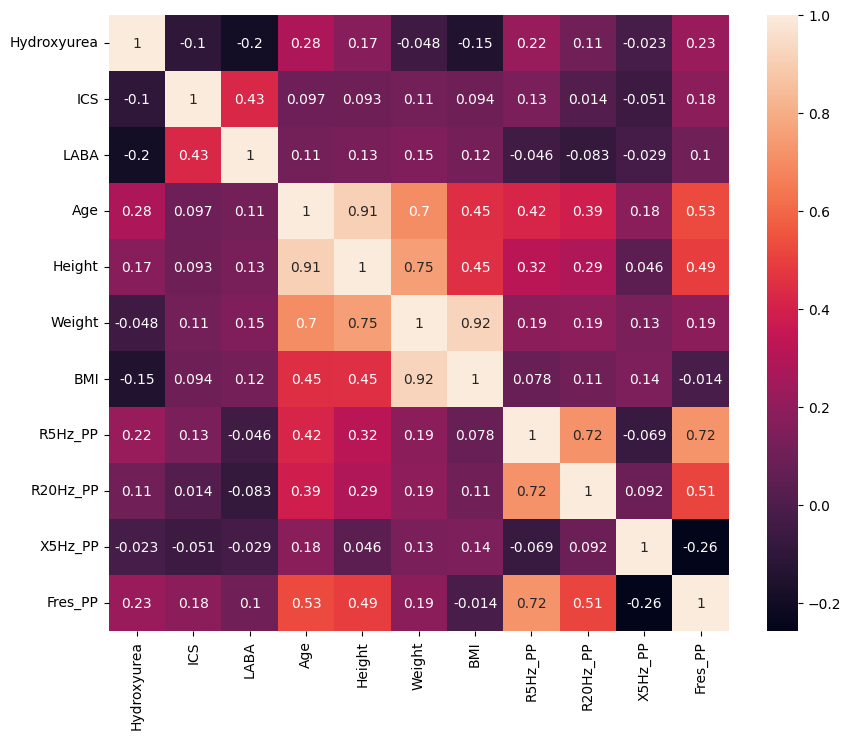

In [76]:
plt.figure(figsize=(10,8))
sns.heatmap(data.select_dtypes(include=["int64", "float64"]).corr(), annot=True)

C:\Users\SANTI\AppData\Local\Temp\ipykernel_4164\3566764349.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='BMI', data=data, palette='muted')


<Axes: xlabel='Gender', ylabel='BMI'>

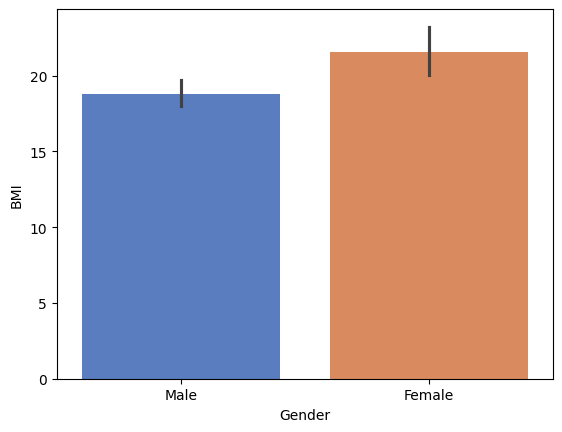

In [77]:
sns.barplot(x='Gender', y='BMI', data=data, palette='muted')

<Axes: xlabel='Weight'>

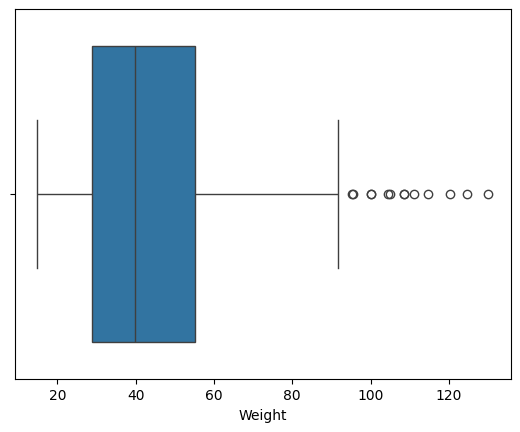

In [78]:
sns.boxplot(x='Weight', data=data)

In [79]:
#Traitement des outliers
# Fonction pour détecter et remplacer les valeurs aberrantes avec les Bounds
def replace_outliers(df):
    for col in df.select_dtypes(include=['number']).columns:  # Only process numeric columns 
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [80]:
replace_outliers(data)

In [81]:
data.dtypes

Hydroxyurea    float64
Asthma          object
ICS            float64
LABA           float64
Gender          object
Age            float64
Height         float64
Weight         float64
BMI            float64
R5Hz_PP        float64
R20Hz_PP       float64
X5Hz_PP        float64
Fres_PP        float64
dtype: object

In [82]:
data['Fres_PP'].min()

6.1

In [83]:
data['Fres_PP'].max()

22.475

In [84]:
# Sauvegarde du dataset nettoyé
data.to_csv("BMI_IOS_SCD_Asthma_Clean.csv", index=False)

# Modèle de Machine Learning (Random Forest Classifier)

In [85]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [86]:
# Encodage de la variable cible cut et de Gender, utilisation de LabelEncoder
label_encoder = LabelEncoder()
data["New_Asthma"] = label_encoder.fit_transform(data["Asthma"])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

data.drop("Asthma", axis=1, inplace=True)

# Vérifier le résultat
data.head()

,Hydroxyurea,ICS,LABA,Gender,Age,Height,Weight,BMI,R5Hz_PP,R20Hz_PP,X5Hz_PP,Fres_PP,New_Asthma
0,1.0,1.0,0.0,1,19.916667,164.1,61.5,22.84,0.5075,0.399,0.0450,13.23,1
1,1.0,1.0,0.0,1,16.083333,162.7,62.3,23.53,0.3605,0.294,-0.1665,16.90,1
2,1.0,1.0,0.0,1,17.666667,163.5,63.1,23.60,0.3745,0.294,-0.2610,15.90,1
3,1.0,1.0,0.0,1,18.666667,163.8,63.7,23.74,0.3045,0.261,0.0450,13.23,1
4,0.0,0.0,0.0,0,17.000000,154.5,66.4,27.82,0.4340,0.363,-0.1470,13.50,0


In [87]:
# Séparation des variables secondaires et de la variable cible
X = data.drop(columns=['New_Asthma'])
y = data['New_Asthma']

In [88]:
X

,Hydroxyurea,ICS,LABA,Gender,Age,Height,Weight,BMI,R5Hz_PP,R20Hz_PP,X5Hz_PP,Fres_PP
0,1.0,1.0,0.0,1,19.916667,164.1,61.5,22.84,0.5075,0.399,0.0450,13.23
1,1.0,1.0,0.0,1,16.083333,162.7,62.3,23.53,0.3605,0.294,-0.1665,16.90
2,1.0,1.0,0.0,1,17.666667,163.5,63.1,23.60,0.3745,0.294,-0.2610,15.90
3,1.0,1.0,0.0,1,18.666667,163.8,63.7,23.74,0.3045,0.261,0.0450,13.23
4,0.0,0.0,0.0,0,17.000000,154.5,66.4,27.82,0.4340,0.363,-0.1470,13.50
...,...,...,...,...,...,...,...,...,...,...,...,...
214,0.0,1.0,0.0,1,8.666667,124.0,25.7,16.71,0.2100,0.216,-0.1215,9.40
215,0.0,0.0,0.0,0,11.500000,160.0,50.6,19.77,0.2940,0.258,-0.1440,13.60
216,0.0,1.0,0.0,1,7.750000,133.0,30.8,17.41,0.2345,0.201,-0.1095,9.90
217,0.0,1.0,0.0,1,7.500000,135.0,31.3,17.17,0.3640,0.249,-0.2340,12.00


In [89]:
y

0      1
1      1
2      1
3      1
4      0
      ..
214    1
215    1
216    1
217    1
218    1
Name: New_Asthma, Length: 219, dtype: int32

In [90]:
# Séparation du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
categorial_features = ['Gender']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [92]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorial_features)
    ])

In [93]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [94]:
param_grid = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_leaf': [1, 2, 5],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__class_weight': ['balanced', 'balanced_subsample', None]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Hydroxyurea',
                                                                          'ICS',
                                                                          'LABA',
                                                                          'Age',
                                                                          'Height',
                                                                          'Weight',
                                                                          'BMI',
                                                                          'R5Hz_PP',
                                                                          'R20Hz_PP',
                                                                          'X5Hz_PP',
                                                                          'Fres_PP']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': ['balanced',
                                                      'balanced_subsample',
                                                      None],
                         'classifier__max_depth': [3, 5, 10, None],
                         'classifier__min_samples_leaf': [1, 2, 5],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [95]:
# Meilleurs paramètres et scores
best_params = grid_search.best_params_
best_params

{'classifier__class_weight': 'balanced',
 'classifier__max_depth': 5,
 'classifier__min_samples_leaf': 2,
 'classifier__n_estimators': 50}

In [96]:
# Nettoyer les clés des hyperparamètres
cleaned_params = {key.split('__')[-1]: value for key, value in best_params.items()}

# Créer le modèle final avec les hyperparamètres nettoyés
model_ml = grid_search.best_estimator_

In [97]:
# Entraînement du modèle
model_ml.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Hydroxyurea', 'ICS', 'LABA',
                                                   'Age', 'Height', 'Weight',
                                                   'BMI', 'R5Hz_PP', 'R20Hz_PP',
                                                   'X5Hz_PP', 'Fres_PP']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_leaf=2, n_estimators=50,
                                        random_state=42))])

In [98]:
# Prédiction avec le modèle
y_pred_dt = model_ml.predict(X_test)
y_pred_dt

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [99]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef
import pickle

In [100]:
# Évaluation du modèle
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.8863636363636364

In [101]:
# Binarisation pour AUC multiclass
# Binariser y_test pour le calcul de l'AUC multi-classe
classes = model_ml.classes_  # ou np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Prédiction
y_pred = model_ml.predict(X_test)
y_proba = model_ml.predict_proba(X_test)

# Calcul des métriques
metrics = {
    "Modèle": model_ml,
    "Meilleurs paramètres": grid_search.best_params_,
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred, average='macro'),
    "Precision": precision_score(y_test, y_pred, average='macro'),
    "F1-score": f1_score(y_test, y_pred, average='macro'),
    "Kappa": cohen_kappa_score(y_test, y_pred),
    "MCC": matthews_corrcoef(y_test, y_pred)
}

# Affichage des résultats
metrics


{'Modèle': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer()),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   ['Hydroxyurea', 'ICS', 'LABA',
                                                    'Age', 'Height', 'Weight',
                                                    'BMI', 'R5Hz_PP', 'R20Hz_PP',
                                                    'X5Hz_PP', 'Fres_PP']),
                                                  ('cat',
                                                   Pipeline(steps=[('onehot',
                                                                    OneHotEncoder(handle_unknown='ignore'))]),


In [102]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model_ml.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.91      0.94      0.93        34

    accuracy                           0.89        44
   macro avg       0.85      0.82      0.83        44
weighted avg       0.88      0.89      0.88        44

[[ 7  3]
 [ 2 32]]


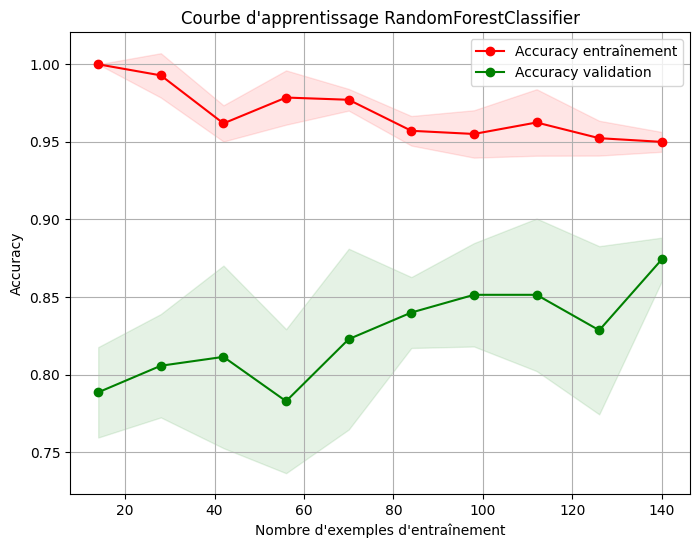

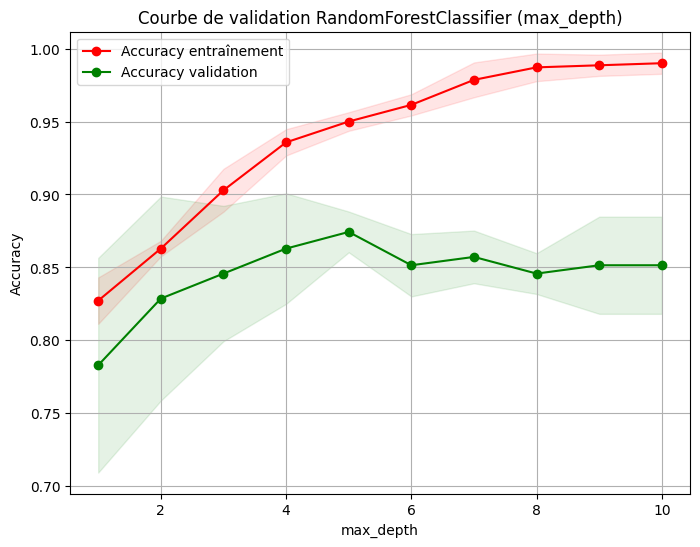

In [103]:
from sklearn.model_selection import learning_curve, validation_curve


# COURBE D'APPRENTISSAGE
train_sizes, train_scores, val_scores = learning_curve(
    model_ml,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts-types
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Accuracy entraînement")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.plot(train_sizes, val_mean, 'o-', color="g", label="Accuracy validation")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")
plt.title("Courbe d'apprentissage RandomForestClassifier")
plt.xlabel("Nombre d'exemples d'entraînement")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


# COURBE DE VALIDATION

# Exemple avec l'hyperparamètre max_depth

param_range = np.arange(1, 11)

train_scores, val_scores = validation_curve(
    model_ml,
    X_train,
    y_train,
    param_name="classifier__max_depth",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Moyennes et écarts-types
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(param_range, train_mean, 'o-', color="r", label="Accuracy entraînement")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.plot(param_range, val_mean, 'o-', color="g", label="Accuracy validation")
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")
plt.title("Courbe de validation RandomForestClassifier (max_depth)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

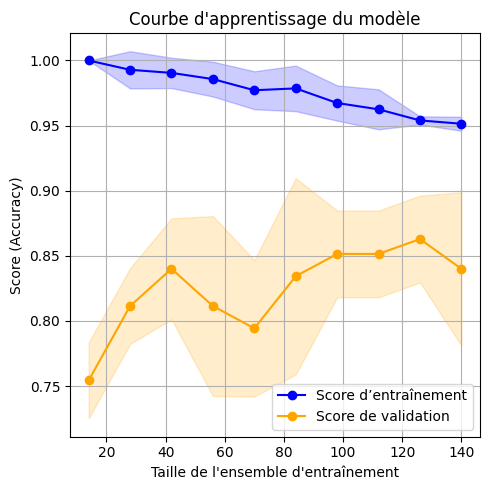

In [104]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np


# Apprentissage & validation
train_sizes, train_scores, val_scores = learning_curve(
    model_ml,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Moyenne et écart-type
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Affichage
plt.figure(figsize=(5, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Score d’entraînement')
plt.plot(train_sizes, val_scores_mean, 'o-', color='orange', label='Score de validation')

# Remplissage des zones d'écart-type
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.2, color='blue')
plt.fill_between(train_sizes,
                 val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std,
                 alpha=0.2, color='orange')

plt.title("Courbe d'apprentissage du modèle")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score (Accuracy)")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
# Validation croisée globale
cv_scores = cross_val_score(model_ml, X, y, cv=5, scoring='accuracy')
print("Scores CV :", cv_scores)
print("Mean CV Accuracy :", cv_scores.mean())
print("Std CV Accuracy :", cv_scores.std())

Scores CV : [0.77272727 0.84090909 0.95454545 0.79545455 0.81395349]
Mean CV Accuracy : 0.8355179704016914
Std CV Accuracy : 0.06357575446671446


In [106]:
# Sauvegarde du modèle avec pickle
import pickle
pickle.dump(model_ml, open('model_asthma.pkl', 'wb'))